<a href="https://colab.research.google.com/github/brendanpshea/data-science/blob/main/DataScience_12_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Methods in Wonderland

Welcome to the curious realm of machine learning, where computers gain the ability to learn and improve from experience, much like Alice adapting to the whimsical logic of Wonderland! Machine learning is a subset of artificial intelligence that focuses on the development of algorithms and statistical models that enable computer systems to perform tasks without explicit instructions, relying instead on patterns and inference.

Imagine if the flowers in the golden afternoon could learn to identify new blooms without being told their names, or if the Caterpillar's hookah could predict the effects of its smoke based on past puffs. This is the essence of machine learning – it's about creating systems that can automatically learn and improve from experience.

In the world of machine learning, data plays the role of Alice's experiences in Wonderland. Just as Alice's interactions shape her understanding of this bizarre realm, data shapes the machine's understanding of its task. The algorithms we'll explore are like the curious rules of Wonderland – they define how our machine will learn from this data.

In this chapter, we'll venture through four distinct areas of this learning landscape:

1. **Logistic Regression.** As precise as the White Rabbit's pocket watch, this method helps us predict binary ("yes" or "no") outcomes. It's like deciding whether a grin will materialize into the Cheshire Cat or remain just a floating smile.
2. **k-Nearest Neighbors (k-NN).** This friendly method classifies new data points based on their closest neighbors, much like how the Dormouse might decide which tea party conversation to join based on the chatter of those nearest to him.
3. **Decision Trees.** We'll explore an enchanted forest of decisions, where each branch leads to a new choice, mirroring Alice's journey through Wonderland. These trees help us make classifications through a series of questions.
4. **K-means Clustering.** This method organizes our data into groups as distinct as the various creatures Alice encounters. It's like sorting the Queen's playing card soldiers into suits without knowing the categories in advance.

Each of these methods brings its own brand of magic to the world of machine learning, solving problems with the same sense of wonder that Alice brings to her adventures in Wonderland. They represent different approaches to learning from data:

- **Supervised learning** (like Logistic Regression and k-NN), where our algorithm learns from labeled examples, much as Alice learns the rules of Wonderland through her interactions with its inhabitants.
- **Unsupervised learning** (like K-means Clustering), where the algorithm discovers hidden patterns in unlabeled data, similar to Alice making sense of Wonderland without a guide.
- A mix of both (like Decision Trees), which can be used for both supervised and unsupervised tasks, adapting to the nature of the data much as Alice adapts to each new situation she encounters.

As we explore these methods, we'll see how machines can learn to make predictions, classify new information, make decisions, and find patterns – all without being explicitly programmed for each task. It's a journey into a world where computers gain abilities that seem almost as magical as the events in Wonderland!


### Learning Outcomes

By the end of this chapter, you will be able to:

1.  Explain the basic principles of Logistic Regression, k-Nearest Neighbors, Decision Trees, and K-means Clustering using Wonderland metaphors.
2.  Implement each of these four methods using Python and relevant libraries such as scikit-learn.
3.  Understand the appropriate applications for each method in classification and clustering tasks.
4.  Evaluate the performance of these models using various metrics like accuracy, precision, recall, and silhouette score.
5.  Visualize the decision boundaries and results of these algorithms using matplotlib.
6.  Compare and contrast the strengths and weaknesses of each method.
7.  Preprocess data appropriately for each algorithm, including scaling features when necessary.
8.  Interpret the results of each method in the context of the problem being solved.

## Logistic Regression: Predicting Outcomes in Wonderland

**Logistic regression** is a fundamental tool in machine learning, particularly useful for solving classification problems. But what does that mean? Let's break it down:

- **Classification**: This is about predicting which category something belongs to. For example, will it rain today or not? Will a student pass or fail an exam?
- **Binary Outcome**: Logistic regression specifically deals with outcomes that have only two possible results. Yes or no. True or false. 1 or 0.

Logistic regression helps us answer questions like these by calculating the probability of an outcome.


To make this concept easier to understand, let's imagine Alice from "Alice in Wonderland" is trying to predict something:

**Alice's Question**: Will the Cheshire Cat appear when she sees a mysterious floating smile?

This is a perfect scenario for logistic regression because there are only two possible outcomes:
1. The Cheshire Cat appears (Yes/1)
2. The Cheshire Cat doesn't appear (No/0)

### Collecting Data

Before Alice can make predictions, she needs data. Here's how she might collect it:

1. Alice walks around Wonderland for several days.
2. Every time she sees a floating smile, she notes it down.
3. She then waits to see if the Cheshire Cat appears.
4. She records the result (appeared or didn't appear).

After a week, Alice's data might look something like this:

| Day | Floating Smile Seen? | Cheshire Cat Appeared? |
|-----|----------------------|------------------------|
| 1   | Yes                  | Yes                    |
| 2   | No                   | No                     |
| 3   | Yes                  | Yes                    |
| 4   | Yes                  | No                     |
| 5   | No                   | No                     |

### Preparing the Data

Now Alice needs to convert her data into a format that's suitable for logistic regression:

- **Feature (X)**: This is the input. In our case, it's whether a floating smile was seen.
  - Yes = 1
  - No = 0

- **Target (Y)**: This is what we're trying to predict. Here, it's whether the Cheshire Cat appeared.
  - Yes = 1
  - No = 0

So Alice's data now looks like this:

| X (Floating Smile) | Y (Cheshire Cat Appeared) |
|--------------------|---------------------------|
| 1                  | 1                         |
| 0                  | 0                         |
| 1                  | 1                         |
| 1                  | 0                         |
| 0                  | 0                         |

### Understanding the Logistic Function

The heart of logistic regression is the logistic function (also called the **sigmoid function**). It looks like this:

$P(Y=1) = \frac{1}{1 + e^{-(β₀ + β₁X)}}$

Don't worry if this looks complicated! Let's break it down:

- $P(Y=1)$ is the probability that Y equals 1 (in our case, the probability the Cheshire Cat appears)
- $e$ is a mathematical constant (about 2.71828)
- $β₀$ and $β₁$ are parameters our model will learn
- $X$ is our input (whether a smile was seen)

This function always gives us a value between 0 and 1, which is perfect for representing a probability!

### Training the Model

Now comes the "learning" part of machine learning. We need to find the best values for $β₀$ and $β₁$. Here's how it works:

1. Start with random values for $β₀$ and $β₁$.
2. Use these to calculate probabilities for each data point.
3. Compare these probabilities to the actual outcomes.
4. Adjust $β₀$ and $β₁$ to make the predictions more accurate.
5. Repeat steps 2-4 many times.

This process is called **gradient descent**, and it's how the model "learns" from the data.

### Making Predictions

Once Alice has trained her model, she can use it to make predictions! Here's how:

1. Alice sees a floating smile (X = 1).
2. She plugs this into her model: $P(Y=1) = \frac{1}{1 + e^{-(β₀ + β₁(1))}}$
3. Let's say this gives her a probability of 0.7 (70%).
4. Alice decides that if the probability is over 50%, she'll predict the Cheshire Cat will appear.
5. Since 70% > 50%, Alice predicts the Cheshire Cat will appear!

### Evaluating the Model

After making several predictions, Alice can check how well her model is doing:

- **Accuracy**: What percentage of predictions were correct?
- **Precision**: When the model predicted the Cat would appear, how often was it right?
- **Recall**: Out of all the times the Cat actually appeared, how many did the model correctly predict?

These metrics help Alice understand if her model is reliable and where it might be making mistakes.

### Conclusion

Logistic regression is a powerful tool that allows us to make predictions about binary outcomes based on input data. By using the logistic function and training on existing data, we can create models that help us understand and predict the world around us - even in a place as unpredictable as Wonderland!

Remember, while we used a simple example with only one feature (the floating smile), logistic regression can handle multiple features, making it a versatile tool in many real-world scenarios.

### Implementing Logistic Regression in Python
Now, let’s move from Wonderland to the world of Python. We’ll use the `pydataset` library to find a suitable dataset and implement logistic regression.

First, let's install and import the necessary libraries:

In [ ]:
!pip install pydataset -q
import pandas as pd
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
initiated datasets repo at: /root/.pydataset/


For this example, we’ll use the **Titanic** dataset available in pydataset. This dataset contains information about the passengers aboard the Titanic, and our goal will be to predict whether a passenger survived based on their characteristics.

In [ ]:
# Load the Titanic dataset
titanic = data('titanic')

# rename class to pclass
titanic = titanic.rename(columns={'class': 'pclass'})

# Display the first few rows
titanic.head()

,pclass,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes


Next, we'll prepare the data by selecting relevant features and splitting it into training and testing sets:

In [ ]:
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split

# Define mappings for categorical variables
mappings = {
    '1st class': 1, '2nd class': 2, '3rd class': 3,
    'adults': 1, 'children': 0,
    'man': 1, 'woman': 0,
    'yes': 1, 'no': 0
}

# Apply the mapping to relevant columns
df = titanic.replace(mappings)

# Split the data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Fit the logistic regression model using the training set
model = sm.Logit.from_formula('survived ~ pclass + age + sex', data=train_df)
result = model.fit()

# Print the model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.492220
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                 1052
Model:                          Logit   Df Residuals:                     1048
Method:                           MLE   Df Model:                            3
Date:                Wed, 04 Sep 2024   Pseudo R-squ.:                  0.2594
Time:                        13:34:57   Log-Likelihood:                -517.81
converged:                       True   LL-Null:                       -699.20
Covariance Type:            nonrobust   LLR p-value:                 2.563e-78
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4503      0.215      2.098      0.036       0.030       0.871
age[T.child]     1.1820

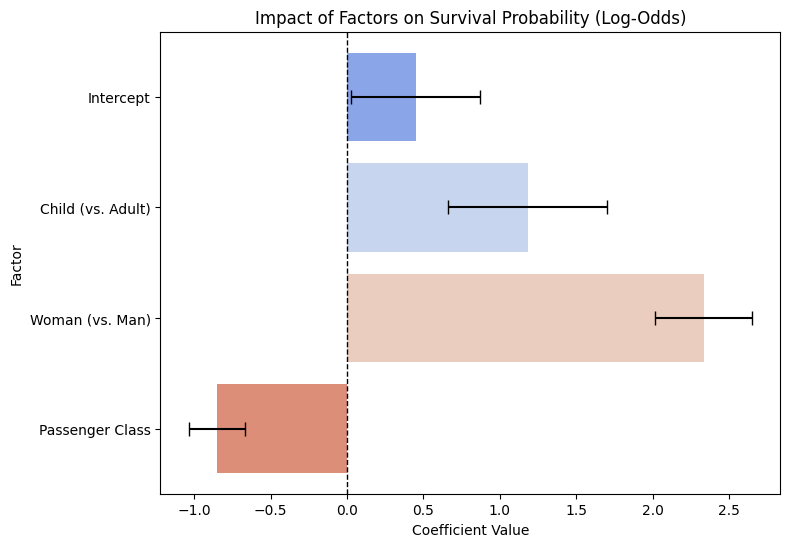

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract the coefficients and their confidence intervals
coef_df = pd.DataFrame({
    'Factor': ['Intercept', 'Child (vs. Adult)', 'Woman (vs. Man)', 'Passenger Class'],
    'Coefficient': result.params,
    'Lower CI': result.conf_int()[0],
    'Upper CI': result.conf_int()[1]
})

# Plot the coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Factor', data=coef_df, errorbar=None,
            palette=sns.color_palette("coolwarm", n_colors=len(coef_df)), hue='Factor', dodge=False, legend=False)

# Add error bars for the confidence intervals
plt.errorbar(coef_df['Coefficient'], coef_df['Factor'],
             xerr=[coef_df['Coefficient'] - coef_df['Lower CI'],
                   coef_df['Upper CI'] - coef_df['Coefficient']],
             fmt='none', c='black', capsize=5)

plt.title('Impact of Factors on Survival Probability (Log-Odds)')
plt.xlabel('Coefficient Value')
plt.ylabel('Factor')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)  # Vertical line at 0 for reference
plt.show()


### Interpreting Logistic Regression

| Criteria | Description | Example and Interpretation |
|----------|-------------|---------------------------|
| No. Observations | The total number of data points used to train the model. <br> This is important because larger sample sizes generally lead to more reliable results. | 1052 observations were used in this model, which is a good sample size for most analyses. |
| Pseudo R-squared | A measure of the model's goodness of fit, ranging from 0 to 1. <br>Unlike R-squared in linear regression, it doesn't represent the proportion of variance explained, but higher values generally indicate better fit. | 0.2594 - This suggests the model explains about 26% of the variation in the outcome. <br>While there's no universally accepted threshold, this indicates a moderate fit. |
| LLR p-value | The p-value for the likelihood ratio test. This test compares the fitted model to a null model (with no predictors).<br> A small p-value (\< 0.05) indicates that the model as a whole is statistically significant. | 2.563e-78 - <br>This extremely small p-value (\< 0.05) indicates that our model is significantly better at predicting survival than a model with no predictors. |
| coef | The estimated coefficients for each predictor.<br> In logistic regression, these represent the change in log-odds of the outcome for a one-unit increase in the predictor. | sex[T.women]: 2.3331 - This means that being a woman increases the log-odds of survival by 2.3331, holding other variables constant.<br> To interpret this in terms of odds, we would exponentiate this coefficient (e^2.3331 ≈ 10.31), meaning women had about 10.31 times higher odds of survival than men. |
| std err | The standard error of the coefficient estimate. <br> It measures the average amount that the coefficient estimates vary from the actual average of our population. | sex[T.women]: 0.162 - This relatively small standard error suggests that our estimate of the effect of being a woman on survival is fairly precise. |
| z | The z-statistic, calculated as the coefficient divided by its standard error. <br> It's used to calculate the p-value for each coefficient. | sex[T.women]: 14.381 - This large z-value suggests that the effect of being a woman on survival is substantial relative to its standard error. |
| P>\|z\| | The p-value for the z-test. It tests whether the coefficient is significantly different from 0.<br> A small p-value (\< 0.05) indicates that the predictor has a statistically significant effect on the outcome. | sex[T.women]: 0.000 - This p-value is less than 0.05, indicating that being a woman had a statistically significant effect on the odds of survival. |
| [0.025 0.975] | The 95% confidence interval for the coefficient. <br> We can be 95% confident that the true population parameter lies within this range. | sex[T.women]: [2.015, 2.651] - We can be 95% confident that the true effect of being a woman on the log-odds of survival lies between 2.015 and 2.651. <br>Since this interval doesn't include 0, it confirms that the effect is statistically significant. |

Key Takeaways:
1. The model is statistically significant overall (LLR p-value < 0.05).
2. Being a woman was a strong, positive predictor of survival.
3. The model has a moderate fit (Pseudo R-squared = 0.2594), suggesting there may be other important factors not included in the model.
4. All predictors in the model (age, sex, and pclass) are statistically significant (P>\|z\| < 0.05 for all).
5. The large sample size (1052 observations) lends confidence to our results.

This output tells a story: children and women were more likely to survive the Titanic disaster, while those in lower classes were less likely to survive. This kind of interpretation is crucial for understanding the implications of the model's findings.

### Evaluating Predictions
Now, that we have created our model, let's use it to make predictions on our **test data** (we can do this because we used only part of our original data to train the model).

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test set
# The predicted probabilities from the model are continuous, so we need to convert them to binary predictions
# We'll use 0.5 as the threshold for classifying survived (1) vs not survived (0)
test_predictions_prob = result.predict(test_df)
test_predictions = np.where(test_predictions_prob > 0.5, 1, 0)

# Actual values
actual_values = test_df['survived']

# Calculate accuracy
accuracy = accuracy_score(actual_values, test_predictions)

# Generate confusion matrix
conf_matrix = confusion_matrix(actual_values, test_predictions)

# Generate classification report
class_report = classification_report(actual_values, test_predictions)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.7955
Confusion Matrix:
[[140  26]
 [ 28  70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       166
           1       0.73      0.71      0.72        98

    accuracy                           0.80       264
   macro avg       0.78      0.78      0.78       264
weighted avg       0.79      0.80      0.80       264



Great! We've now evaluated our logistic regression model for predicting Titanic passenger survival using test data. The evaluation provides insights into the model's performance through various metrics. Let's break down these results and what they mean.

| Metric | Description | Overall | Did Not Survive (Class 0) | Survived (Class 1) |
|--------|-------------|---------|---------------------------|-------------------|
| Accuracy | Proportion of correct predictions (both true positives and true negatives) among the total number of cases examined | 0.7955 | - | - |
| Precision | Proportion of correct positive predictions out of all positive predictions | - | 0.83 | 0.73 |
| Recall | Proportion of correct positive predictions out of all actual positive cases | - | 0.84 | 0.71 |
| F1-score | Harmonic mean of precision and recall, providing a single score that balances both metrics | - | 0.84 | 0.72 |
| Support | Number of occurrences of each class in the test dataset | 264 | 166 | 98 |

Confusion Matrix:
```
[[140  26]
 [ 28  70]]
```
Where:
- True Negatives (TN) = 140: Correctly predicted non-survivors
- False Positives (FP) = 26: Incorrectly predicted survivors
- False Negatives (FN) = 28: Incorrectly predicted non-survivors
- True Positives (TP) = 70: Correctly predicted survivors

Key takeways:

1. The model has a good overall accuracy of 79.55%, meaning it correctly predicts the survival outcome for about 4 out of 5 passengers.
2. The model is slightly better at identifying non-survivors (84% recall) than survivors (71% recall).
3. When the model predicts non-survival, it's correct 83% of the time (precision for class 0). For survival predictions, it's correct 73% of the time (precision for class 1).
4. The balanced F1-scores suggest the model performs consistently across both classes, with a slight edge in predicting non-survival.
5. While the model performs well, there's room for improvement, especially in correctly identifying survivors.

# k-Nearest Neighbors: The Mad Hatter's Tea Classification Adventure

## Introduction to k-Nearest Neighbors (k-NN)

k-Nearest Neighbors (k-NN) is a simple yet powerful machine learning algorithm used for both classification and regression tasks. But what does that mean? Let's break it down:

- **Classification**: This is about predicting which category something belongs to. For example, is this email spam or not? Is this a picture of a cat or a dog?
- **Regression**: This is about predicting a continuous value. For example, what will be the price of this house?
- **Neighbors**: The algorithm makes predictions based on the "closest" data points in the dataset.

k-NN works on the principle that similar things exist in close proximity. It's like the old saying, "Tell me who your friends are, and I'll tell you who you are."

To make this concept easier to understand, let's imagine the Mad Hatter from "Alice in Wonderland" is trying to classify different types of tea:

## The Mad Hatter's Tea Classification Challenge

The Mad Hatter loves tea, but he's having trouble keeping track of all the different types. He decides to use k-NN to help him classify his teas.

### Collecting Data

The Mad Hatter collects data on various teas, noting two key features:

1. **Caffeine Content** (measured in mg per cup)
2. **Flavor Intensity** (rated on a scale of 1-10)

He also knows the type of each tea (Green, Black, or Herbal).

After a week of tasting and measuring, the Mad Hatter's data might look something like this:

| Caffeine (mg) | Flavor Intensity | Tea Type |
|---------------|------------------|----------|
| 25            | 7                | Green    |
| 50            | 8                | Black    |
| 0             | 5                | Herbal   |
| 30            | 6                | Green    |
| 40            | 9                | Black    |
| 2             | 4                | Herbal   |

### How k-NN Works for the Mad Hatter

1. **Plot the Data**: The Mad Hatter plots each tea on a graph, with Caffeine Content on the x-axis and Flavor Intensity on the y-axis.

2. **New Tea Arrives**: A new, unknown tea arrives with 35mg of caffeine and a flavor intensity of 7.

3. **Choose k**: The Mad Hatter decides to look at the 3 nearest neighbors (k=3).

4. **Find Nearest Neighbors**: He measures the distance from the new tea to all other teas on his graph. The 3 closest are:
   - Green Tea (30mg caffeine, 6 flavor)
   - Green Tea (25mg caffeine, 7 flavor)
   - Black Tea (40mg caffeine, 9 flavor)

5. **Majority Vote**: Among these 3 nearest neighbors, 2 are Green and 1 is Black. Therefore, k-NN predicts the new tea is most likely a Green Tea.

### The Magic of k

The 'k' in k-NN is a hyperparameter that the Mad Hatter can adjust. If k=1, he'd only look at the single closest neighbor. If k=5, he'd look at the 5 closest neighbors. Choosing the right k is important:

- A small k is more sensitive to local patterns but can be affected by outliers.
- A large k is more robust but might miss out on local patterns.

The Mad Hatter might need to experiment with different k values to find the best one for his tea classification!

## Implementing k-NN in Python: Wine Classification

Now, let's move from Wonderland to the world of Python. We'll use the wine dataset to implement k-NN classification.

First, let's import the necessary libraries and load the data:

In [ ]:
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Load the wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the k-NN classifier
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

     class_0       0.89      0.89      0.89        19
     class_1       0.75      0.71      0.73        21
     class_2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



This code will output the accuracy of our k-NN model and a detailed classification report. Here's what we see:

| Metric | Description | Interpretation | Example from Data |
|--------|-------------|----------------|-------------------|
| Accuracy | Proportion of correct predictions (both true positives and true negatives) among the total number of cases examined | Higher is better. 1.0 is perfect. | 0.74 (74% of all predictions were correct) |
| Precision | Proportion of correct positive predictions out of all positive predictions | Higher is better. Measures the model's ability to avoid labeling negative samples as positive. | Class_0: 0.89 (89% of samples predicted as class_0 were actually class_0) |
| Recall | Proportion of correct positive predictions out of all actual positive cases | Higher is better. Measures the model's ability to find all positive samples. | Class_0: 0.89 (89% of all actual class_0 samples were correctly identified) |
| F1-score | Harmonic mean of precision and recall | Higher is better. Provides a single score that balances both precision and recall. | Class_0: 0.89 (indicates a good balance between precision and recall for class_0) |
| Support | Number of samples for each class in the test set | Not a performance metric, but provides context for interpreting other metrics. | Class_0: 19 samples |

Note: In this dataset, the model performs best on class_0, moderately well on class_1, and struggles somewhat with class_2. The overall accuracy of 74% suggests room for improvement, especially in classifying class_2 samples.

### Visualizing k-NN Decision Boundaries
To better understand how k-NN makes decisions, let's visualize its decision boundaries. We'll use only two features for this visualization:

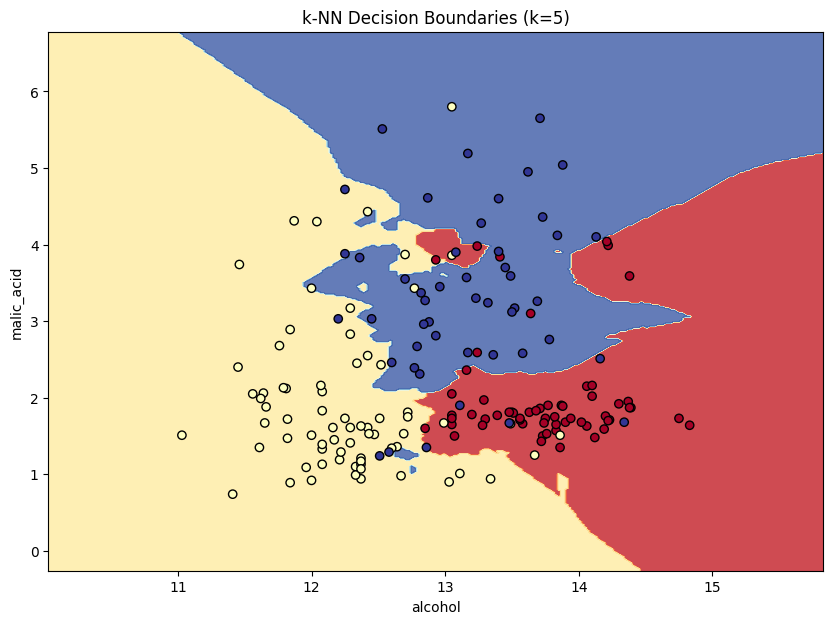

In [ ]:
# Select two features for visualization
X = wine.data[:, [0, 1]]  # Using the first two features
y = wine.target

# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Train the k-NN classifier
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Predict for each point in the mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.title('k-NN Decision Boundaries (k=5)')

plt.show()

## Decision Trees: The Queen of Hearts' Health Diagnosis Adventure

Decision trees are powerful and intuitive machine learning algorithms used for both classification and regression tasks. They work by making a series of decisions based on the features of the data, much like a flowchart. Let's break down the key concepts:

- **Root Node**: The starting point of the tree, representing the entire dataset.
- **Decision Nodes**: Points where the data is split based on certain conditions.
- **Leaf Nodes**: The end points of the tree, representing the final classifications or predictions.
- **Branches**: The connections between nodes, representing the possible outcomes of a decision.

Decision trees are popular because they're easy to understand and interpret, even for non-experts. They mirror human decision-making processes, making them particularly useful in fields like medicine and finance.

To illustrate how decision trees work, let's imagine a scenario in Wonderland:

The Queen of Hearts is feeling unwell, and a doctor from the real world has been summoned to diagnose her condition. The doctor decides to use a decision tree to determine if the Queen has the fictional "Wonderland Fever."


The doctor collects data on various symptoms and factors:

1. **Temperature**: Is the Queen's temperature above 38°C (100.4°F)?
2. **Whimsy Level**: On a scale of 1-10, how whimsical is the Queen feeling?
3. **Croquet Played**: Has the Queen played croquet in the last 24 hours?
4. **Tarts Consumed**: How many tarts has the Queen eaten today?

Based on these factors, the doctor constructs a simple decision tree:

```
                Is Temperature > 38°C?
                /                 \
               /                   \
             Yes                    No
             /                       \
    Whimsy Level < 3?          Croquet Played?
        /       \                /        \
      Yes       No             Yes        No
      /           \             |          \
Wonderland    Tarts > 5?    Not Fever   Not Fever
  Fever       /        \
            Yes        No
            /            \
    Wonderland        Not Fever
      Fever
```

### How the Decision Tree Works

1. **First Decision**: The doctor checks the Queen's temperature. If it's above 38°C, we move to the left branch; otherwise, to the right.

2. **Subsequent Decisions**: Depending on the path, the doctor checks other factors like Whimsy Level, Croquet Played, and Tarts Consumed.

3. **Reaching a Diagnosis**: The process continues until a leaf node is reached, providing the final diagnosis: Wonderland Fever or Not Fever.

### Interpreting the Tree

- If the Queen has a high temperature and low whimsy, it's likely Wonderland Fever.
- Even with a normal temperature, if she hasn't played croquet, she's diagnosed as not having the fever.
- High temperature, high whimsy, and excessive tart consumption also indicate Wonderland Fever.

This tree allows the doctor to quickly diagnose the Queen's condition by asking a series of simple questions.

## Implementing Decision Trees in Python: Wisconsin Breast Cancer Dataset

Now, let's move from Wonderland to a real-world application using the Wisconsin Breast Cancer dataset. This dataset contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass, describing characteristics of the cell nuclei present in the image.

First, let's import the necessary libraries and load the data:

In [ ]:
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Load the breast cancer dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the decision tree classifier
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=521)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))

Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.94      0.95        63
      benign       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



This code will output the accuracy of our decision tree model and a detailed classification report.

### Visualizing the Decision Tree
To better understand how the decision tree makes decisions, let's visualize it:

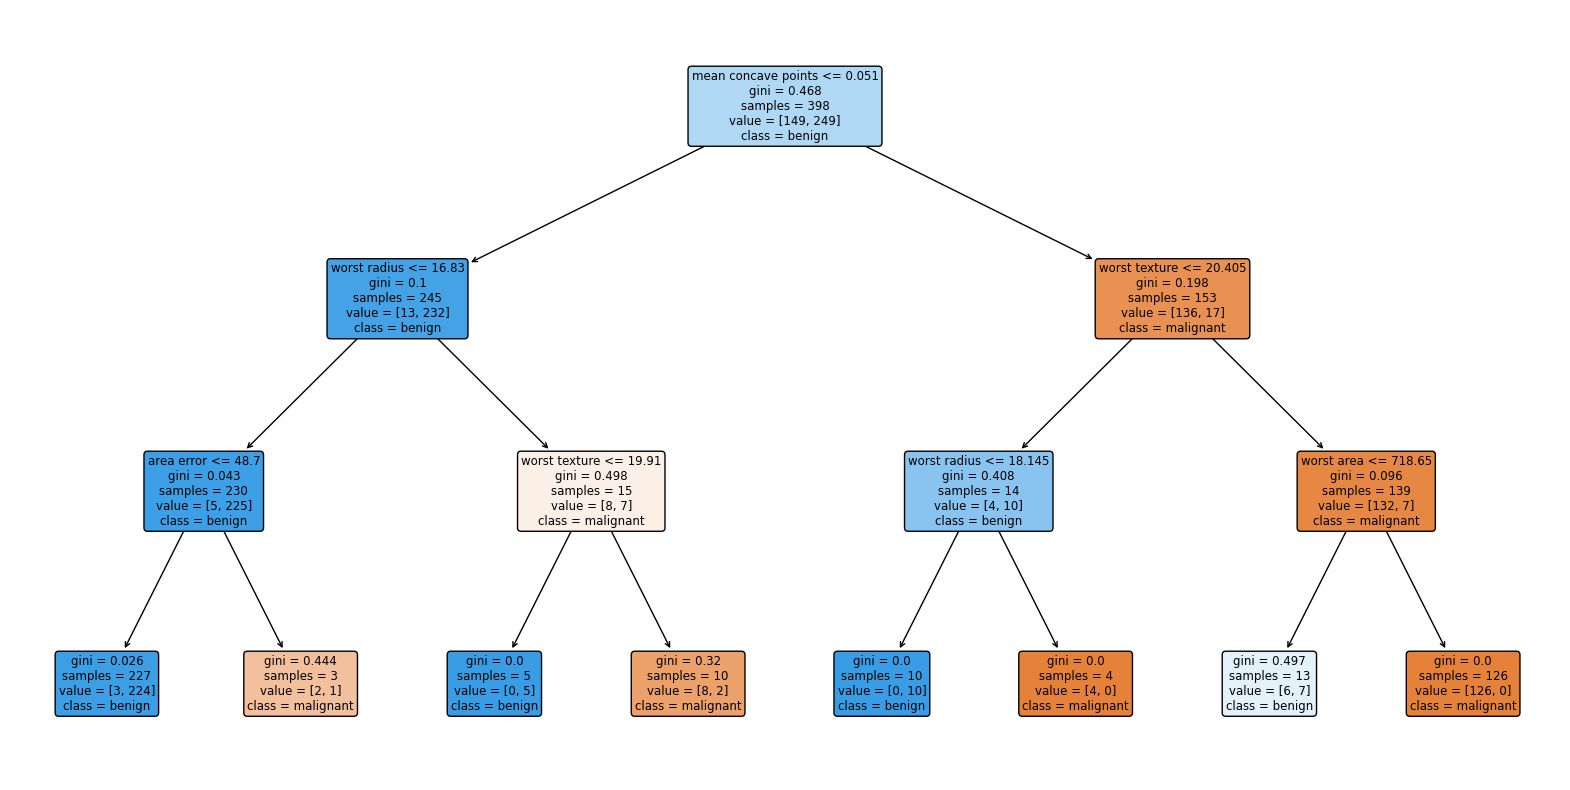

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=cancer.feature_names, class_names=cancer.target_names, filled=True, rounded=True)
plt.show()

A decision tree is like a flowchart that helps make decisions. Here's how to understand what you're seeing:

1. Root Node (Top Box):
   - This is where we start. It shows the first decision the tree makes.
   - For examaple, "mean concave points <= 0.051" might be the "root" decision rule. If true, go left; if false, go right.

2. Node Information:
   - **Gini:** This measures how "mixed up" the data is at this point.
     - Ranges from 0 to 1.
     - 0 means all samples are of one class (pure).
     - 0.5 means a perfect 50/50 split (most impure).
     - Here, 0.468 indicates there's still quite a mix of classes.
   - Samples: The number of data points at this node (398 in the root).
   - Value: Shows the split between classes [149, 249]. Here, 149 samples are of one class, 249 of another.
   - Class: The majority class at this node ("benign" in this case).

3. Branches:
   - Lines connecting nodes represent different paths based on the decision.

4. Child Nodes:
   - Follow the same structure as the root node but with a subset of the data.
   - In our example, the left child node has 245 samples and is much purer (Gini = 0.1).

5. Reading a Path:
   - Start at the top.
   - Follow the branches based on whether the condition is true (left) or false (right).
   - The final node you reach gives the classification.

6. Interpretation:
   - Features near the top (like "mean concave points") are more important for classification.
   - Nodes with lower Gini values are more "certain" about their classification.

This tree suggests that cell concavity and radius are key factors in determining whether a sample is benign or malignant.

### Feature Importance
Decision trees can also help us understand which features are most important for making predictions:

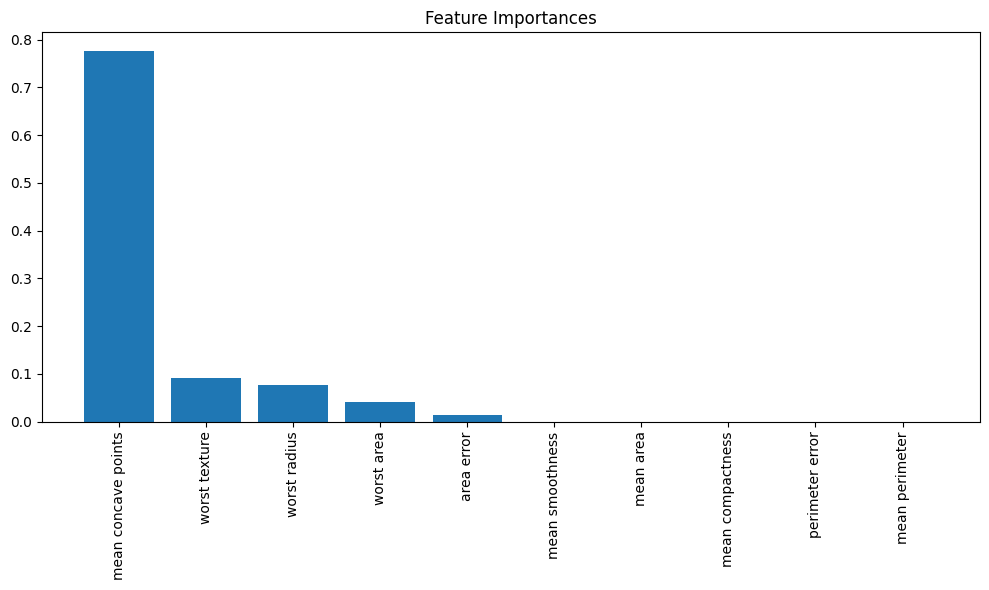

In [ ]:
importances = clf.feature_importances_
feature_names = cancer.feature_names
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(10), importances[indices][:10])
plt.xticks(range(10), [feature_names[i] for i in indices][:10], rotation=90)
plt.tight_layout()
plt.show()

This will show a bar plot of the top 10 most important features according to the decision tree.

## K-means Clustering: Alice's Wonderland Garden Adventure

Let's suppose Alice finds herself in a peculiar garden filled with an assortment of talking flowers. The garden is a cacophony of chatter, with flowers of various colors, heights, and personalities all trying to converse at once. Overwhelmed by the chaos, Alice decides to organize the flowers into more manageable conversation groups. Little does she know, she's about to embark on a journey that mirrors the workings of a powerful machine learning technique: K-means clustering.

**K-means clustering** is an unsupervised machine learning algorithm used to group similar data points together. It's like organizing a jumbled box of colorful buttons into neat piles based on their characteristics. In Alice's case, she'll be grouping flowers based on their shared traits.

As Alice observes the garden, she notices three main characteristics of the flowers:

1. Petal Color: Ranging from pale (0) to vibrant (10)
2. Stem Height: Measured in whimsical Wonderland units (WU)
3. Chattiness: Quantified by the number of words spoken per minute

These characteristics will serve as the features for our clustering adventure. Here's the idea:

1. Alice decides to create three conversation groups, which in the world of K-means, we call clusters. The number of **clusters**, denoted as 'K', is a parameter we choose before starting the algorithm. In this case, K equals 3.
2. Our clustering adventure begins with Alice randomly selecting three flowers as initial group centers. This is akin to the initialization step in K-means, where we choose initial **centroids**.
3. Next, Alice goes through the garden, assigning each flower to the group center it's most similar to, based on their characteristics. This is the **assignment step in K-means, where each data point is assigned to the nearest centroid.
4. After assigning all the flowers, Alice recalculates the center of each group by averaging the characteristics of all flowers in that group. This mirrors the **update step** in K-means, where we recalculate the centroids based on the mean of all points assigned to them.
5. Alice repeats the assignment and update steps several times. With each iteration, the group centers shift slightly, and flowers may change groups. This process continues until the group centers stabilize, and flowers stop switching groups. In K-means terms, we say the algorithm has **converged.**

After several rounds, Alice steps back to admire her work. The garden has transformed from a chaotic mix to three distinct clusters of flowers:

1. The Colorful Chatterboxes -- A group of vibrant, short flowers that talk incessantly.
2. The Tall Tales -- Statuesque flowers with moderate colors and average chattiness.
3. The Quiet Pastels -- Soft-spoken, pale flowers of medium height.

This arrangement ensures that similar flowers are grouped together, leading to more harmonious conversations in the garden. Alice has successfully applied K-means clustering to solve her Wonderland dilemma!

### K-Means and KNN
Now, let's contrast Alice's clustering adventure with another machine learning technique we learned earlier: **K-Nearest Neighbors (KNN).** Imagine a new flower suddenly sprouts in the garden, and Alice wants to determine which conversation group it should join. If she were using KNN, she would measure the new flower's characteristics and then find the K nearest flowers based on these traits. The new flower would then be categorized based on the majority group of its K nearest neighbors.

This comparison brings us to an important distinction in machine learning: **supervised** versus **unsupervised** learning. Alice's original clustering of the garden flowers represents unsupervised learning. She grouped the flowers based on their inherent similarities without any predefined categories. It's as if she entered a new part of the garden and organized the flowers purely based on her observations.

On the other hand, using KNN to categorize a new flower would be an example of supervised learning. It's like Alice having a guidebook that labels certain flowers as "friendly," "grumpy," or "mischievous." She would use this labeled data to predict the category of the new flower based on its similarity to known examples.

The key differences between K-means and KNN in our Wonderland context are:

1. K-means doesn't require pre-labeled flowers, while KNN needs a labeled dataset.
2. K-means discovers natural groupings, while KNN predicts categories for new flowers.
3. K-means is great for exploring patterns, while KNN excels at classifying based on known examples.

In the real world, choosing between K-means and KNN depends on your specific problem and the nature of your data. K-means is excellent for discovering underlying patterns in data, like finding natural groupings among customers for market segmentation. KNN, on the other hand, is great for classifying new items based on known examples, like predicting whether a new email is spam based on previously labeled emails.

As Alice continues her adventures in Wonderland, she might find many more applications for these techniques. Perhaps she could use K-means to help the Cheshire Cat organize his collection of grins, or KNN to assist the White Rabbit in predicting whether he'll be late based on his morning routine. The possibilities in Wonderland, as in data science, are endless!

### Python Example: Clustering Iris Flowers
Now that we've explored K-means clustering through Alice's Wonderland adventure, let's see how it works in practice with a Python example. We'll use the famous Iris dataset, which contains measurements of iris flowers.
First, let's import the necessary libraries and load the data:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data

Next, we'll preprocess our data by standardizing the features. This is important because K-means is sensitive to the scale of the features:

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Now, let's apply K-means clustering. We'll use 3 clusters, just like Alice did in her garden:

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Get cluster assignments and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


To visualize our results, we'll create a scatter plot using two of the iris features:

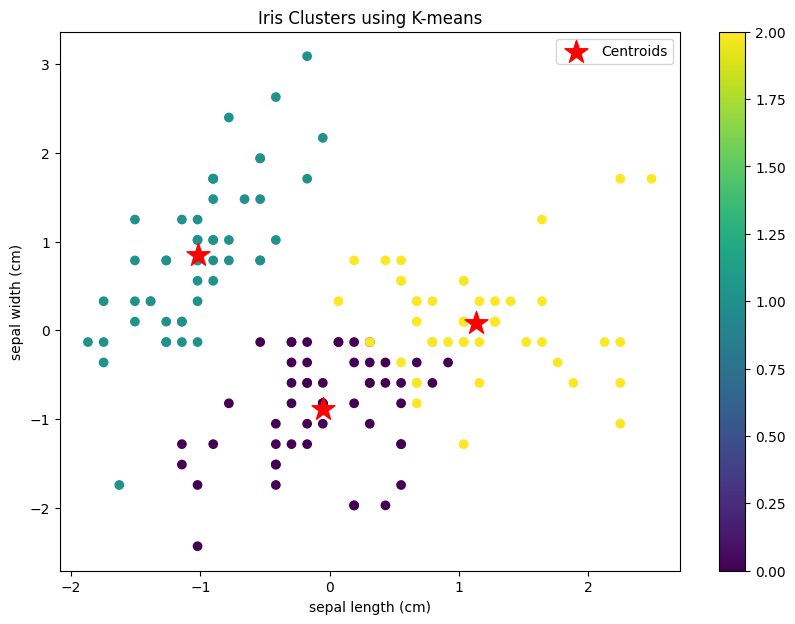

In [ ]:
# Visualize the clusters (using the first two features)
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='red', label='Centroids')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Iris Clusters using K-means')
plt.legend()
plt.colorbar(scatter)
plt.show()

This plot will show how the iris flowers are grouped into three clusters based on their features, much like how Alice grouped her talking flowers.

To evaluate how well our clustering performed, we can use the silhouette score:

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, labels)
print(f"The average silhouette score is: {silhouette_avg:.3f}")

The average silhouette score is: 0.460


A higher silhouette score (closer to 1) indicates better-defined clusters.
Finally, let's compare our K-means clusters to the actual iris species:

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Create a confusion matrix
cm = confusion_matrix(iris.target, labels)
cm_df = pd.DataFrame(cm, index=['setosa', 'versicolor', 'virginica'],
                     columns=['Cluster 0', 'Cluster 1', 'Cluster 2'])

print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
            Cluster 0  Cluster 1  Cluster 2
setosa              0         50          0
versicolor         39          0         11
virginica          14          0         36


This confusion matrix shows how well our K-means clusters align with the actual iris species. It's important to note that K-means doesn't know about these species labels; it's clustering based solely on the flower measurements.

In our Wonderland analogy, this would be like Alice comparing her conversation groups to an expert botanist's classification of the flowers. She might find that her groups largely correspond to actual flower species, even though she created them without this knowledge!


# More Methods of Machine Learning in Wonderland

As we venture deeper into the rabbit hole of machine learning, we discover that the world of algorithms is as vast and varied as Wonderland itself. Let's explore some additional magical methods, each with its own unique approach to learning from data.

### Support Vector Machines (SVM)

Support Vector Machines are like the Cheshire Cat's grin, creating an invisible boundary in space. SVMs work by finding the optimal **hyperplane** that best separates different classes of data. This hyperplane is chosen to maximize the **margin**, which is the distance between the hyperplane and the nearest data points from each class, called **support vectors**. In cases where the data isn't linearly separable, SVMs use a **kernel trick** to transform the data into a higher-dimensional space where a separating hyperplane can be found.

Simplified algorithm:
1. The Queen of Hearts scatters her playing cards (data points) on a table.
2. The Cheshire Cat's grin appears (hyperplane), trying to separate the red cards from the black ones.
3. The grin adjusts its position and curve to keep the maximum possible distance (margin) from the nearest cards of each color.
4. If the cards are mixed up, the Cheshire Cat uses his magic (kernel trick) to lift some cards off the table, making them separable in this new 3D space.

SVMs are particularly effective for classification tasks in high-dimensional spaces and when there's a clear margin of separation between classes. They're widely used in image classification, handwriting recognition, and bioinformatics. However, they can be computationally expensive for large datasets and don't directly provide probability estimates.

### Random Forests

Random Forests are like a council of wise old oak trees in the Tulgey Wood, each with its own unique perspective. This **ensemble learning** method operates by constructing a multitude of **decision trees** during training and outputting the class that is the **mode** of the classes (for classification) or mean prediction (for regression) of the individual trees. The "random" in Random Forests comes from two main sources of randomness: **bagging** (bootstrap aggregating) of samples and random selection of features at each node.

Simplified algorithm:
1. The Caterpillar collects a bag of mushroom pieces (bootstrap sample) from different parts of Wonderland.
2. He grows a decision tree from these pieces, but at each branch, he randomly chooses which characteristics to consider (feature selection).
3. The Caterpillar repeats this process many times, creating a forest of diverse decision trees.
4. When Alice asks a question, each tree gives its opinion, and the forest's answer is the most common response (voting).

Random Forests are prized for their ability to prevent overfitting, handle large datasets with higher dimensionality, and provide feature importance rankings. They're widely used in various domains, from finance (predicting stock market trends) to healthcare (disease prediction) and ecology (species distribution modeling). However, the model can be computationally intensive and less interpretable compared to single decision trees.


### Naive Bayes

Naive Bayes is like the White Rabbit making quick judgments based on individual observations, assuming each is independent of the others. This probabilistic classifier is based on applying **Bayes' theorem** with strong (naive) independence assumptions between the features. Despite its simplicity, Naive Bayes can often outperform more sophisticated classification methods. It calculates the **probability** of a data point belonging to a particular class given its features, assuming these features are **conditionally independent** given the class.

Simplified algorithm:
1. The White Rabbit observes various characteristics of Wonderland inhabitants (features).
2. For each characteristic, he calculates how often it appears in each category (e.g., how often are creatures with pocket watches late?).
3. When encountering a new creature, the Rabbit multiplies the probabilities of each observed characteristic for each possible category.
4. He then chooses the category with the highest probability as his prediction.

Naive Bayes classifiers are particularly useful for text classification tasks, such as spam detection or sentiment analysis. They're also effective in situations with high-dimensional data and smaller training sets. The algorithm is fast, easy to implement, and can handle streaming data. However, its "naive" assumption of feature independence can be a limitation in scenarios where features are strongly correlated.

### Neural Networks and Deep Learning

Neural Networks are like the interconnected, ever-changing pathways of Wonderland itself, capable of learning and adapting to solve complex problems. At their core, neural networks consist of layers of interconnected **nodes** or **neurons**, each performing simple computations. **Deep Learning** refers to neural networks with multiple hidden layers, capable of learning hierarchical representations of data. The network learns by adjusting the **weights** of connections between neurons based on the error of its predictions, a process called **backpropagation**.

Simplified algorithm:
1. Alice encounters a series of doors (input layer), each with a unique keyhole (feature).
2. Behind these doors are hidden rooms (hidden layers) filled with creatures that examine what comes through the keyholes.
3. These creatures pass along transformed information to the final room (output layer), where the Cheshire Cat makes a prediction.
4. If the prediction is wrong, the Cat's grin fades, and a whisper travels back through the rooms, subtly changing how each creature interprets information (backpropagation).

Neural networks, especially deep learning models, have revolutionized many fields including computer vision, natural language processing, and speech recognition. They excel at finding patterns in large, complex datasets and can automatically learn feature representations. However, they often require large amounts of data and computational resources, and their decision-making process can be difficult to interpret.

## Key Points Summary

-   Logistic Regression predicts binary outcomes, like determining whether the Cheshire Cat will appear based on the presence of a floating smile.
-   k-Nearest Neighbors classifies data points based on their proximity to other labeled points, similar to grouping Wonderland characters by their shared traits.
-   Decision Trees make classifications through a series of questions, branching out like the paths in the Tulgey Wood.
-   K-means Clustering organizes data into groups without prior labeling, much like sorting the Queen's roses by color without knowing the categories in advance.
-   Each method has its own strengths: Logistic Regression for binary classification, k-NN for pattern recognition, Decision Trees for interpretable decisions, and K-means for discovering natural groupings.
-   Python libraries like scikit-learn provide powerful tools for implementing these algorithms.
-   Data preprocessing, including scaling features, is crucial for the performance of these methods.
-   Visualization techniques help in understanding the behavior and results of these algorithms.
-   Evaluation metrics such as accuracy, precision, recall, and silhouette score are essential for assessing model performance.
-   The choice of method depends on the specific problem, the nature of the data, and the desired outcome, much like how Alice's approach changes based on the curious situations she encounters in Wonderland.

Remember, just as Alice's curiosity led her to uncover the wonders of Wonderland, your exploration of these machine learning methods will reveal the magic hidden within your data!

## Glossary
| Term | Definition |
|------|------------|
| Accuracy | The proportion of correct predictions (both true positives and true negatives) among the total number of cases examined. |
| Backpropagation | An algorithm used to train neural networks by calculating gradients of the loss function with respect to the network's weights, allowing for efficient weight updates. |
| Bagging | A machine learning ensemble technique that combines multiple models trained on different subsets of the data to improve overall performance and reduce overfitting. |
| Branch | In decision trees, a path from a decision node to its child nodes, representing a specific decision or split based on a feature. |
| Centroid (k-means) | The arithmetic mean position of all points in a cluster, serving as the cluster's center in k-means clustering. |
| Cluster | A group of similar data points in a dataset, often identified through unsupervised learning techniques like k-means clustering. |
| Conditional independence | A relationship between variables where two events are independent of each other given the value of a third event. |
| Confusion matrix | A table used to evaluate classification model performance, showing the numbers of true positives, true negatives, false positives, and false negatives. |
| Convergence (algorithm) | The state reached by an iterative algorithm when further iterations produce negligible changes in the solution or output. |
| Decision boundary | The surface that separates different classes in a classification problem, often visualized in 2D or 3D space. |
| Decision node | A point in a decision tree where a split occurs based on a specific feature, leading to different branches. |
| Decision Trees | A tree-like model used for classification and regression tasks, making decisions based on a series of feature-based splits. |
| Deep learning | A subset of machine learning using neural networks with multiple layers to learn hierarchical representations of data. |
| Ensemble learning | A technique that combines multiple models to create a more robust and accurate predictor than individual models alone. |
| Euclidean distance | The straight-line distance between two points in Euclidean space, calculated using the Pythagorean theorem. |
| F1-score | The harmonic mean of precision and recall, providing a single score that balances both metrics in classification tasks. |
| Feature | An individual measurable property or characteristic of a phenomenon being observed, used as input in machine learning models. |
| Gini (purity) | A measure of impurity used in decision trees to evaluate the quality of a split, with lower values indicating better splits. |
| Hyperplane | A subspace of one dimension less than its ambient space, used in support vector machines to separate classes in high-dimensional space. |
| K Nearest Neighbors (kNN) | A simple, non-parametric algorithm used for classification and regression based on the majority class or average value of the k nearest data points. |
| K-Means Clustering | An unsupervised learning algorithm that partitions data into k clusters based on the proximity to the cluster centroids. |
| Leaf node | A terminal node in a decision tree that represents a final classification or prediction, with no further splits. |
| Logistic regression | A statistical method for predicting a binary outcome based on one or more independent variables, using the logistic function. |
| Machine learning | A field of AI that focuses on creating algorithms and statistical models that enable computer systems to improve their performance on a task through experience. |
| Naïve bayes | A probabilistic classifier based on Bayes' theorem with an assumption of independence between features. |
| Neuron | The basic computational unit in a neural network, typically consisting of weighted inputs, an activation function, and an output. |
| Neural network | A computational model inspired by biological neural networks, consisting of interconnected nodes (neurons) organized in layers. |
| P>\|z\| | The p-value associated with the z-statistic in statistical hypothesis testing, indicating the probability of obtaining the observed result under the null hypothesis. |
| Precision | The ratio of true positive predictions to the total number of positive predictions, measuring the accuracy of positive predictions. |
| Random forest | An ensemble learning method that constructs multiple decision trees and combines their outputs for improved prediction accuracy and reduced overfitting. |
| Recall | The ratio of true positive predictions to the total number of actual positive instances, measuring the completeness of positive predictions. |
| Root node | The topmost node in a decision tree, representing the entire dataset before any splits are made. |
| Sigmoid function | An S-shaped curve used as an activation function in neural networks, mapping input values to outputs between 0 and 1. |
| Supervised learning | A type of machine learning where the algorithm learns from labeled training data to make predictions or decisions on new, unseen data. |
| Support | In association rule mining, the proportion of transactions that contain a particular itemset. |
| Support vector | Data points in a support vector machine that lie closest to the decision boundary and define the margin. |
| Support vector machine | A supervised learning algorithm that finds the optimal hyperplane to separate classes in high-dimensional space. |
| Target | The variable that a machine learning model aims to predict, also known as the dependent variable or label. |
| Test Data | A subset of the data used to evaluate the performance of a trained model on unseen examples. |
| Training Data | The subset of data used to train a machine learning model, allowing it to learn patterns and relationships. |
| Tree | A hierarchical structure used in various machine learning algorithms, consisting of nodes connected by edges. |
| Unsupervised learning | A type of machine learning where the algorithm learns patterns and structures from unlabeled data without predefined targets. |
| Update step (k-means) | The process of recalculating cluster centroids based on the current assignment of data points to clusters in the k-means algorithm. |
| Weight (neural network) | A parameter in a neural network that determines the strength of the connection between neurons, adjusted during training to improve performance. |